In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import load
from models import MLP
import os

In [2]:
import pandas as pd
import torch
from joblib import load
from models import MLP
from data_helpers import get_species_list


# -------------------- CONFIGURACIÓN --------------------
csv_path = "Otros/DATA_PARA_PREDECIR.xlsx"
scaler_path = "models/scaler/std_scaler_ECOPAL.bin"
model_path = "models/model_ECOPAL.pt"
train_po_path = "data/Records/train_po/ECOPALtrain_po.csv"
output_path = "predicciones_multiespecie_095.csv"

num_species = 20
input_size = 17

# -------------------- CARGAR DATOS --------------------
df = pd.read_excel(csv_path)
coords = df[['x', 'y']].copy()
X = df.drop(columns=['x', 'y'])

# Escalar los datos
scaler = load(scaler_path)
X_scaled = scaler.transform(X)

# Convertir a tensor
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

# -------------------- CARGAR MODELO --------------------
model = MLP(input_size=input_size, output_size=num_species, num_layers=4, width=512, dropout=0.01)
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
model.eval()

# -------------------- PREDICCIÓN --------------------
with torch.no_grad():
    preds = torch.sigmoid(model(X_tensor)).numpy()

# -------------------- NOMBRES DE ESPECIES --------------------
train_po = pd.read_csv(train_po_path)
region = "ECOPAL"  # o la que estés usando
species_names = get_species_list(region, remove=False)

# -------------------- ASIGNAR PREDICCIONES --------------------
for i, name in enumerate(species_names):
    df[name] = preds[:, i]

# -------------------- GUARDAR RESULTADO --------------------
df.to_csv(output_path, index=False)
print(f"Predicciones guardadas en {output_path}")

C:\Users\danny\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.1.3 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Predicciones guardadas en predicciones_multiespecie_095.csv


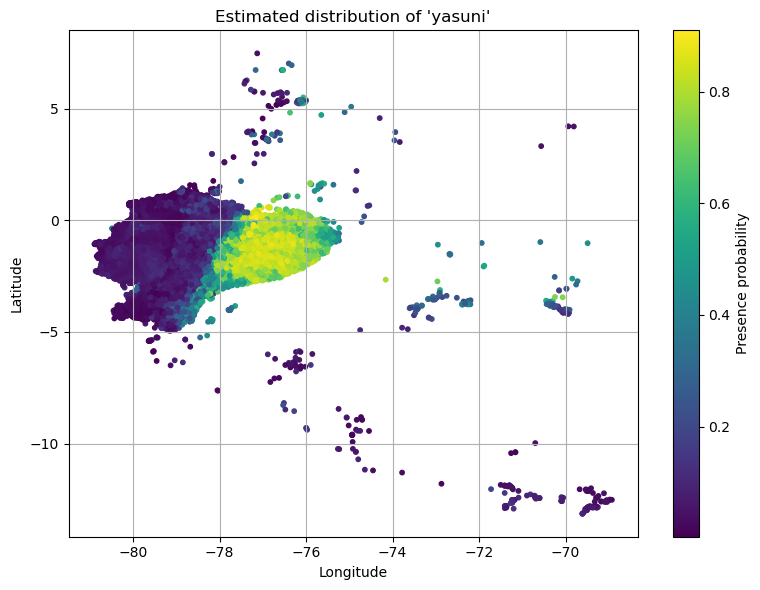

In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# Leer el archivo con predicciones
df = pd.read_csv("predicciones_multiespecie_095.csv")

# Filtrar solo la especie anthonyi
especie = "yasuni"
df_filtrado = df[['x', 'y', especie]].copy()

# Create plot
plt.figure(figsize=(8, 6))
sc = plt.scatter(df_filtrado['x'], df_filtrado['y'], c=df_filtrado[especie], cmap='viridis', s=10)
plt.colorbar(sc, label='Presence probability')
plt.title(f"Estimated distribution of '{especie}'")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()


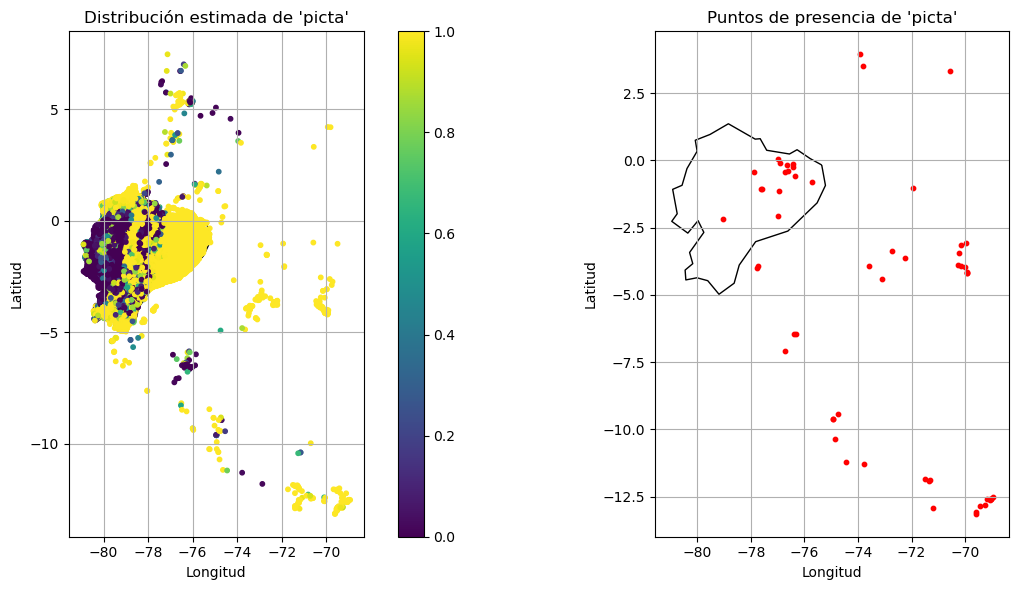

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Leer archivo con predicciones
df_pred = pd.read_csv("predicciones_multiespecie3.csv")
especie = "picta"
df_pred_filtrado = df_pred[['x', 'y', especie]].copy()

# Leer archivo con puntos de presencia
train_po = pd.read_csv("data/Records/train_po/ECOPALtrain_po.csv")
df_presencia = train_po[train_po['spid'] == especie][['x', 'y']]

# Cargar mapa base desde URL oficial (descarga directa)
url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
world = gpd.read_file(url)
ecuador = world[world['ADMIN'] == 'Ecuador']

# Crear GeoDataFrames
gdf_pred = gpd.GeoDataFrame(df_pred_filtrado, geometry=gpd.points_from_xy(df_pred_filtrado.x, df_pred_filtrado.y), crs="EPSG:4326")
gdf_pres = gpd.GeoDataFrame(df_presencia, geometry=gpd.points_from_xy(df_presencia.x, df_presencia.y), crs="EPSG:4326")

# Crear figura
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Predicción
ecuador.plot(ax=axes[0], color='white', edgecolor='black')
gdf_pred.plot(ax=axes[0], column=especie, cmap='viridis', markersize=10, legend=True)
axes[0].set_title(f"Distribución estimada de '{especie}'")
axes[0].set_xlabel("Longitud")
axes[0].set_ylabel("Latitud")
axes[0].grid(True)

# Subplot 2: Puntos de presencia
ecuador.plot(ax=axes[1], color='white', edgecolor='black')
gdf_pres.plot(ax=axes[1], color='red', markersize=10)
axes[1].set_title(f"Puntos de presencia de '{especie}'")
axes[1].set_xlabel("Longitud")
axes[1].set_ylabel("Latitud")
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [34]:
!pip install geodatasets

  Obtaining dependency information for geodatasets from https://files.pythonhosted.org/packages/9d/dd/e30e144271280d263c0c10f34fbcf2e09e9a82bd11a165c5f1f498899a29/geodatasets-2024.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for pooch from https://files.pythonhosted.org/packages/a8/87/77cc11c7a9ea9fd05503def69e3d18605852cd0d4b0d3b8f15bbeb3ef1d1/pooch-1.8.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/64.6 kB ? eta -:--:--
   ---------------------------------------- 64.6/64.6 kB 1.7 MB/s eta 0:00:00


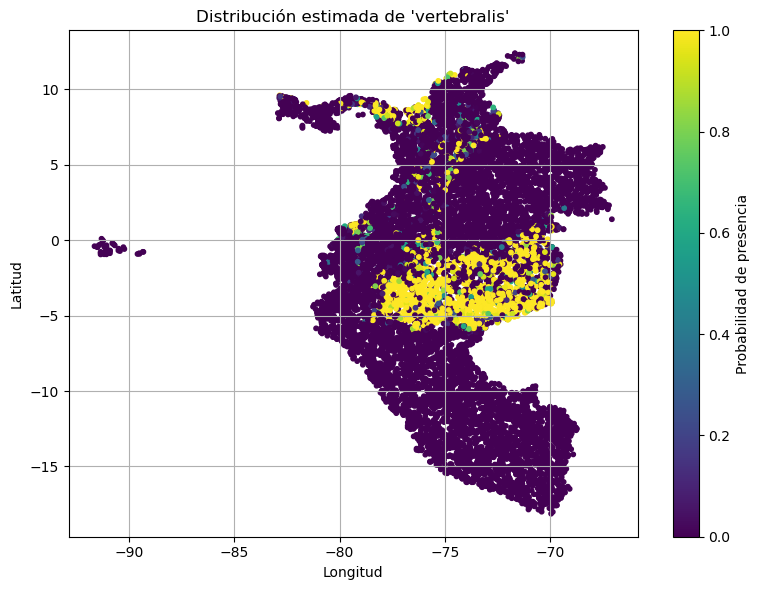

In [18]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Leer el archivo con predicciones
df = pd.read_csv("predicciones_multiespecie_sin_agrupar.csv")

# Filtrar solo la especie anthonyi
especie = "vertebralis"
df_filtrado = df[['x', 'y', especie]].copy()

# Crear gráfico
plt.figure(figsize=(8, 6))
sc = plt.scatter(df_filtrado['x'], df_filtrado['y'], c=df_filtrado[especie], cmap='viridis', s=10)
plt.colorbar(sc, label='Probabilidad de presencia')
plt.title(f"Distribución estimada de '{especie}'")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.tight_layout()
plt.show()